<a href="https://colab.research.google.com/github/pdlozano/air-quality/blob/main/Air_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air Quality

This is a project that aims to graph the analyzed data from [this given dataset](https://archive.ics.uci.edu/ml/datasets/Air+Quality). It tracks the air quality over one year in a road level from an Italian city.

## Attribute Information

1. Date (DD/MM/YYYY)
2. Time (HH.MM.SS)
3. True hourly averaged concentration CO in mg/m^3 (reference analyzer)
4. PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
5. True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
6. True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
7. PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
8. True hourly averaged NOx concentration in ppb (reference analyzer)
9. PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
10. True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
11. PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
12. PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
13. Temperature in °C
14. Relative Humidity (%)
15. AH Absolute Humidity

## Preparation

For now, we're going to import a few items and we'll use matplotlib for graphing.

In [1]:
from io import BytesIO
from zipfile import ZipFile
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

The first step is to download the data from the database itself. The data comes in a CSV format in a zipfile which is fairly easy to get out.

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip"

resp = requests.get(url).content
zipfile = ZipFile(BytesIO(resp))

data = zipfile.open('AirQualityUCI.csv')
data = pd.read_csv(data, delimiter=";")
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


### Data Cleaning

The data itself is fine but we need to clean it to use it. First off, the numbers are in European format which means some data types are represented as objects instead of numbers.

In [4]:
data.dtypes

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

We need to fix it by converting `,` to `.` in all the relevant columns.

In [5]:
columns_to_number = ["CO(GT)", "C6H6(GT)", "T", "RH", "AH"]

for col in columns_to_number:
    data[col] = data[col].str.replace(",", ".")
    data[col] = data[col].astype(np.float)

data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


Next, we simplified the `Date` and `Time` column into one `Datetime` column.

It is important that the format is given because pandas reads the date `10/03/2004` as "October 03" instead of "March 10".

In [6]:
data["Datetime"] = pd.to_datetime(data["Date"] + ' ' + data["Time"], format="%d/%m/%Y %H.%M.%S", errors='coerce')
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16,Datetime
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN,2004-03-10 18:00:00
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN,2004-03-10 19:00:00
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN,2004-03-10 20:00:00
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN,2004-03-10 21:00:00
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN,2004-03-10 22:00:00


Afterwards, we only retained the columns we need and set the `Datetime` column as the index.

In [7]:
useful_columns = ["Datetime", "CO(GT)", "PT08.S1(CO)","NMHC(GT)","C6H6(GT)","PT08.S2(NMHC)","NOx(GT)","PT08.S3(NOx)","NO2(GT)","PT08.S4(NO2)","PT08.S5(O3)","T","RH","AH"]
data = data[useful_columns]
data = data.set_index("Datetime")
data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


Finally, we need to replace all values of `-200` to `None`. This is because the `-200` represents a missing value as stated from the dataset information itself:

> ... Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. **Missing values are tagged with -200 value**.

In [8]:
data = data.replace(-200, None)
data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


Finally, we drop `NaN` values.

In [9]:
data = data.dropna()
data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


### Other Preparation

This part of the preparation isn't really needed. It's just that the labels of the data are not very Pythonic so I decided to make an `attributes` dictionary to make it easier to read.

In [10]:
attributes = {
    "carbon_monoxide": "CO(GT)",
    "tin_oxide": "PT08.S1(CO)",
    "non_metanic_hc": "NMHC(GT)",
    "benzene": "C6H6(GT)",
    "titania": "PT08.S2(NMHC)",
    "nitrogen_oxide": "NOx(GT)",
    "titanium_oxide": "PT08.S3(NOx)",
    "nitrogen_dioxide": "NO2(GT)",
    "tungsten_oxide": "PT08.S4(NO2)",
    "indium_oxide": "PT08.S5(O3)",
    "temperature": "T",
    "relative_humidity": "RH",
    "absolute_humidity": "AH",
}

## Temperature and Humidity Levels Over a Year

Some of the given datapoints in the dataframe above includes temperature and humidity. I decided to plot the two together since I live in a place with relatively constant temperature and humidity.

To do that, we first only take the columns we need.

In [11]:
columns = [
           attributes["temperature"],
           attributes["relative_humidity"],
           attributes["absolute_humidity"],
]

graph_1 = data[columns]
graph_1.head()

,T,RH,AH
Datetime,,,
2004-03-10 18:00:00,13.6,48.9,0.7578
2004-03-10 19:00:00,13.3,47.7,0.7255
2004-03-10 20:00:00,11.9,54.0,0.7502
2004-03-10 21:00:00,11.0,60.0,0.7867
2004-03-10 22:00:00,11.2,59.6,0.7888


Then, we aggregate the data by the day averaging the temperature and humidity in a given day. Afterwards, we can graph the three in one plot.

In [12]:
graph_1 = graph_1.groupby(pd.Grouper(freq='D')).mean()
graph_1.head()

,T,RH,AH
Datetime,,,
2004-03-10,12.033333,54.900000,0.765633
2004-03-11,9.837500,64.075000,0.775767
2004-03-12,11.287500,51.095833,0.663104
2004-03-13,12.866667,51.533333,0.732296
2004-03-14,16.012500,48.850000,0.849671


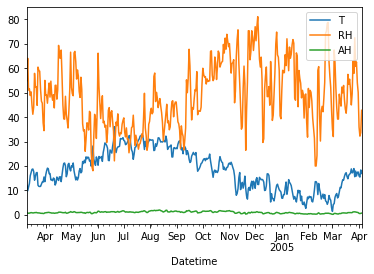

In [13]:
graph_1.plot()

Notice in the graph below that even though the relative humidity changes a lot, the absolute humidity doesn't vary that much. However, it might simply be due to the fact that the value is very close to 0 while the rest is very high. Let's try to graph the absolute humidity on its own.

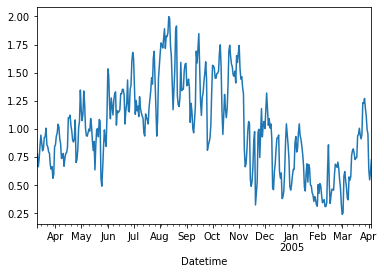

In [14]:
graph_1[attributes["absolute_humidity"]].plot()

It turns out that the highest absolute humidity levels occur somewhere between August and September but the highest relative humidity in November and December. This makes sense since this dataset comes from an Italian city and those are summer levels of humidity.

It also shows the discrepancy between relative humidity and absolute humidity: The highest relative level of humidity occurs in a colder period. This is because relative humidity simply tells us how much water is in the air relative to how much it can hold in the first place. If the air is cold, the air cannot hold much anyway so even if the absolute humidity is low, the relative humidity can reach up to 80% or higher.

## Benzene Levels Over a Year

[Benzene is known among researchers to be positively linked to cancer](https://www.cancer.org/cancer/cancer-causes/chemicals/benzene.html). In other words, it is carcinogenic. Unfortunately, for most of us, we cannot do anything about it especially if we live in the city.

This part aims to graph the benzene levels in the data to see if there is a pattern throughout the year. First, we filter the data to only get the column we need.

In [15]:
columns = [
           attributes["benzene"],
]

graph_2 = data[columns]
graph_2.head()

,C6H6(GT)
Datetime,
2004-03-10 18:00:00,11.9
2004-03-10 19:00:00,9.4
2004-03-10 20:00:00,9.0
2004-03-10 21:00:00,9.2
2004-03-10 22:00:00,6.5


Afterwards, we group the data by day and average it. We can then plot the benzene graph over a given year.

In [16]:
graph_2 = graph_2.groupby(pd.Grouper(freq='D')).mean()
graph_2.head()

,C6H6(GT)
Datetime,
2004-03-10,8.450000
2004-03-11,7.979167
2004-03-12,12.129167
2004-03-13,10.916667
2004-03-14,9.637500


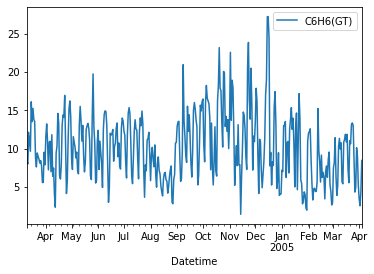

In [17]:
graph_2.plot()

It seems from the graph that the levels of Benzene are pretty stagnant but there are some days between August and September where it is lower than usual and conversely periods in December and January where it is higher than usual.

## Can we predict air quality levels using the time and date?

The last question I have for this data is whether we can predict air quality using the time and date. Although there are 15 attributes in the data, we will only use six to measure air quality:

1. Benzene
2. Carbon Monoxide
3. Non-Metanic Hydrocarbons
4. Nitrogen Oxide
5. Nitrogen Dioxide
6. Ozone (Indium Oxide)

In [18]:
columns = [
           attributes["benzene"],
           attributes["carbon_monoxide"],
           attributes["non_metanic_hc"],
           attributes["nitrogen_oxide"],
           attributes["nitrogen_dioxide"],
           attributes["indium_oxide"], # Targets O3
]

graph_3_data = data[columns]
graph_3_data = graph_3_data.reset_index()
graph_3_data.head()

,Datetime,C6H6(GT),CO(GT),NMHC(GT),NOx(GT),NO2(GT),PT08.S5(O3)
0,2004-03-10 18:00:00,11.9,2.6,150.0,166.0,113.0,1268.0
1,2004-03-10 19:00:00,9.4,2.0,112.0,103.0,92.0,972.0
2,2004-03-10 20:00:00,9.0,2.2,88.0,131.0,114.0,1074.0
3,2004-03-10 21:00:00,9.2,2.2,80.0,172.0,122.0,1203.0
4,2004-03-10 22:00:00,6.5,1.6,51.0,131.0,116.0,1110.0


My goal is to use the date to account for seasons and special events (e.g. Christmas time might produce lower levels of pollutants compared to other days) as well as the time of the day (e.g. maybe there are lower levels of pollution at night). Thus, we extract those data from the index and turn it into two columns.

Note that I will use the day of the year (e.g. 20 February is the 51st day of the year while 31 December is the 365th day of the year). Because the span of data is not a leap year, it will not be accounted.

In [19]:
graph_3_data["Day"] = graph_3_data["Datetime"].apply(lambda date: date.timetuple().tm_yday)
graph_3_data["Hour"] = graph_3_data["Datetime"].apply(lambda date: date.hour)
graph_3_data.head()

,Datetime,C6H6(GT),CO(GT),NMHC(GT),NOx(GT),NO2(GT),PT08.S5(O3),Day,Hour
0,2004-03-10 18:00:00,11.9,2.6,150.0,166.0,113.0,1268.0,70,18
1,2004-03-10 19:00:00,9.4,2.0,112.0,103.0,92.0,972.0,70,19
2,2004-03-10 20:00:00,9.0,2.2,88.0,131.0,114.0,1074.0,70,20
3,2004-03-10 21:00:00,9.2,2.2,80.0,172.0,122.0,1203.0,70,21
4,2004-03-10 22:00:00,6.5,1.6,51.0,131.0,116.0,1110.0,70,22


To combine the day and hour in a single number, we'll use the following formula:

$$
x = \text{Day} + \text{Hour}\times\frac{1}{24}
$$

In [20]:
graph_3_data["x"] = graph_3_data["Day"] + graph_3_data["Hour"] / 24
graph_3_data = graph_3_data.set_index("x")
graph_3_data.head()

,Datetime,C6H6(GT),CO(GT),NMHC(GT),NOx(GT),NO2(GT),PT08.S5(O3),Day,Hour
x,,,,,,,,,
70.750000,2004-03-10 18:00:00,11.9,2.6,150.0,166.0,113.0,1268.0,70,18
70.791667,2004-03-10 19:00:00,9.4,2.0,112.0,103.0,92.0,972.0,70,19
70.833333,2004-03-10 20:00:00,9.0,2.2,88.0,131.0,114.0,1074.0,70,20
70.875000,2004-03-10 21:00:00,9.2,2.2,80.0,172.0,122.0,1203.0,70,21
70.916667,2004-03-10 22:00:00,6.5,1.6,51.0,131.0,116.0,1110.0,70,22


We can now graph each. We shall use multiple plots as each air quality indicator has varying levels of magnitude.

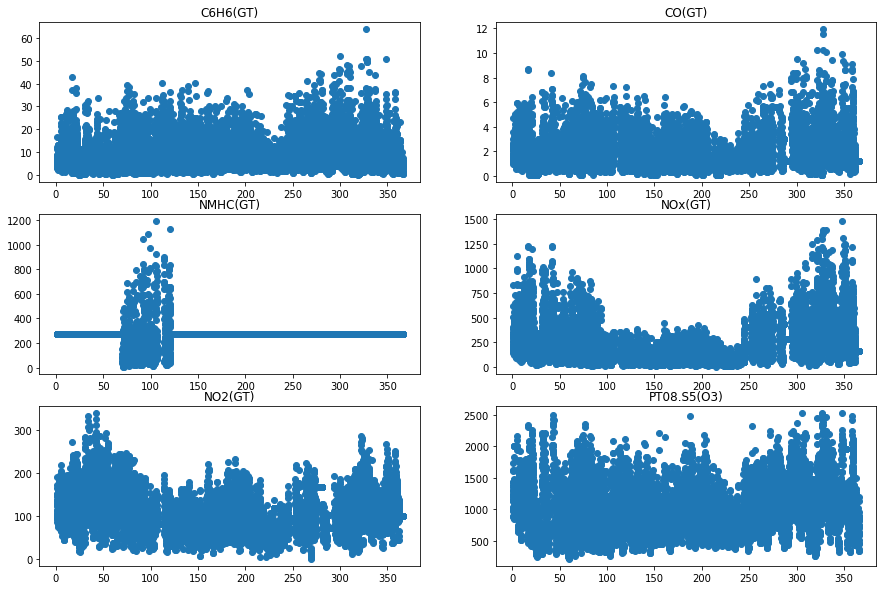

In [21]:
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
graph_3 = graph_3_data[["Day", *columns]]

for i, frame in enumerate(graph_3[columns]):
    axel = ax[i // 2][i % 2]

    axel.set_title(frame)
    axel.scatter(
        graph_3["Day"],
        graph_3[frame]
    )


    plt.plot()

plt.show()

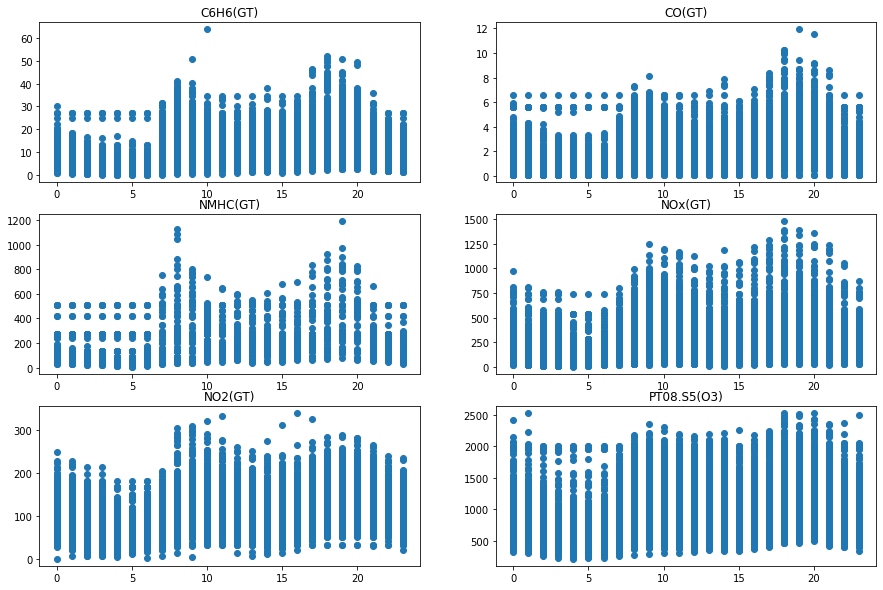

In [22]:
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
graph_4 = graph_3_data[["Hour", *columns]]

for i, frame in enumerate(graph_4[columns]):
    axel = ax[i // 2][i % 2]

    axel.set_title(frame)
    axel.scatter(
        graph_4["Hour"],
        graph_4[frame]
    )


    plt.plot()

plt.show()

It seems that for the hour, there's a large range of air quality. Since this plots everything by date and hour, it seems that is better to combine both. Furthermore, it seems that the data for `NMHC(GT)` is bad and thus, we should ignore it. For fun, let's just replace it with the temperature.

In [23]:
columns = [
           attributes["benzene"],
           attributes["carbon_monoxide"],
           attributes["temperature"],
           attributes["nitrogen_oxide"],
           attributes["nitrogen_dioxide"],
           attributes["indium_oxide"],
]

In [24]:
graph_5 = data.copy()
graph_5 = graph_5.reset_index()
graph_5["Day"] = graph_5["Datetime"].apply(lambda date: date.timetuple().tm_yday)
graph_5["Hour"] = graph_5["Datetime"].apply(lambda date: date.hour)
graph_5["x"] = graph_5["Day"] + graph_5["Hour"] / 24
graph_5 = graph_5.set_index("x")
graph_5 = graph_5[columns]
graph_5.head()

,C6H6(GT),CO(GT),T,NOx(GT),NO2(GT),PT08.S5(O3)
x,,,,,,
70.750000,11.9,2.6,13.6,166.0,113.0,1268.0
70.791667,9.4,2.0,13.3,103.0,92.0,972.0
70.833333,9.0,2.2,11.9,131.0,114.0,1074.0
70.875000,9.2,2.2,11.0,172.0,122.0,1203.0
70.916667,6.5,1.6,11.2,131.0,116.0,1110.0


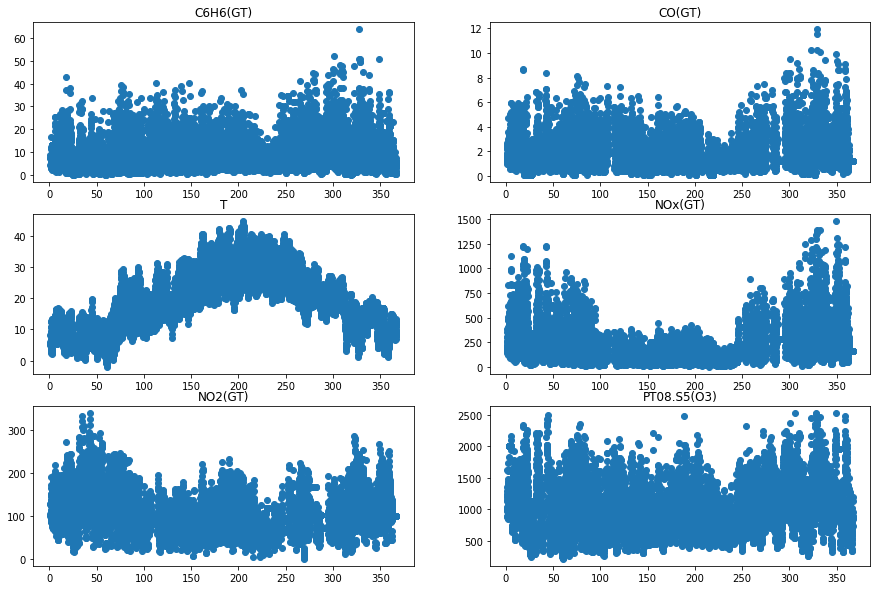

In [25]:
fig, ax = plt.subplots(3, 2, figsize=(15, 10))

for i, frame in enumerate(graph_5):
    axel = ax[i // 2][i % 2]
    axel.set_title(frame)
    axel.scatter(
        graph_5.index,
        graph_5[frame]
    )

    plt.plot()

plt.show()

From the data above, we can see that for Methane, levels are higher during the late stages of the year while Nitrogen Oxide levels are lower during the mid-year. Let's try a polynomial of degree 3 and graph each

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [27]:
def fit_data(x, y):
    poly_reg = PolynomialFeatures(degree=3)
    poly = poly_reg.fit_transform(x.to_numpy().reshape(-1, 1))
    lin_reg = LinearRegression()
    lin_reg.fit(poly, y)

    def predict(x_vals):
        return lin_reg.predict(poly_reg.fit_transform(x_vals))

    return predict


def plot_data(x, y, ax):
    lin_reg = fit_data(x, y)

    ax.scatter(x, y, color='red')

    poly_x = np.arange(0, 366, 0.1)
    poly_x = poly_x.reshape(len(poly_x), 1)
    poly_y = lin_reg(poly_x)
    
    ax.plot(poly_x, poly_y, color='blue')

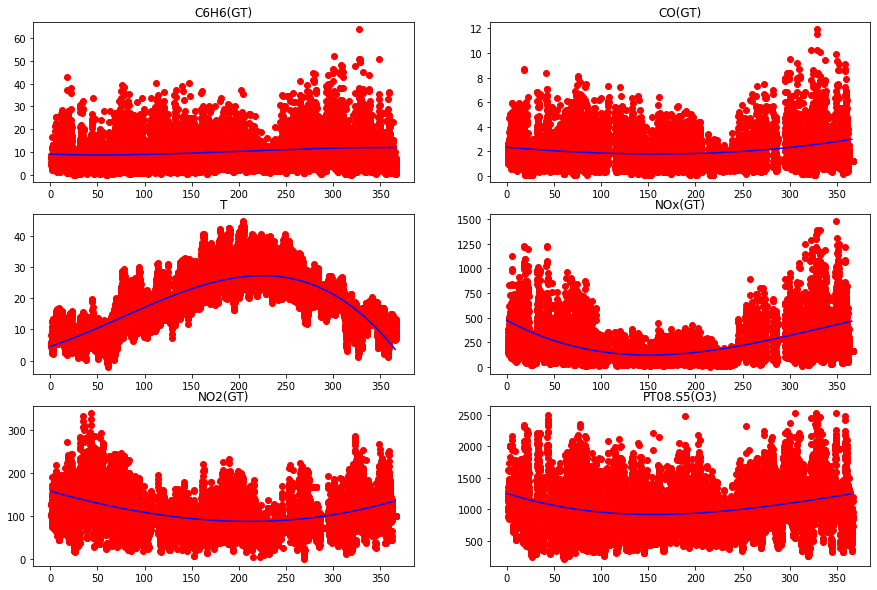

In [28]:
fig, ax = plt.subplots(3, 2, figsize=(15, 10))

for i, frame in enumerate(graph_5):
    axel = ax[i // 2][i % 2]

    axel.set_title(frame)

    if frame == attributes["non_metanic_hc"]:
        continue
    
    plot_data(
        x=graph_5.index,
        y=graph_5[frame],
        ax=axel,
    )

plt.show()

As seen in the graph, the benzene levels are fairly stable throughout the year and particles such as nitrogen oxides get less common during the midyear.

From this, let us try to predict the air levels of different compounds at June 12th 00:00.

In [29]:
import datetime

In [30]:
val = datetime.datetime(2022, 6, 12).timetuple().tm_yday
val = np.array([[val]])
val

array([[163]])

In [31]:
for frame in graph_5:
    if frame == attributes["non_metanic_hc"]:
        continue
    
    func = fit_data(
        x=graph_5.index,
        y=graph_5[frame],
    )

    print(f"{frame}: {func(val)}")

C6H6(GT): [9.80516868]
CO(GT): [1.79073166]
T: [24.24120778]
NOx(GT): [122.01225997]
NO2(GT): [92.42839403]
PT08.S5(O3): [918.46977764]


## Conclusion

It seems that a city does follow some patterns when it comes to air quality with the best quality occuring during the middle of the year. However, this data only describes one city so other cities may have different patterns.